<a href="https://colab.research.google.com/github/Kzis/DL/blob/master/Fibonancci_Simple_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(112)
set_seed(112)

In [4]:
fib_data = pd.read_csv('fib87.csv', nrows=37)
print(fib_data.shape)
fib_data['num'] = fib_data['num'].astype(np.uint64)
fib_data.head()

(37, 1)


,num
0,0
1,1
2,1
3,2
4,3


In [14]:
fib_list = fib_data.values.tolist()
print(fib_list)

[[0], [1], [1], [2], [3], [5], [8], [13], [21], [34], [55], [89], [144], [233], [377], [610], [987], [1597], [2584], [4181], [6765], [10946], [17711], [28657], [46368], [75025], [121393], [196418], [317811], [514229], [832040], [1346269], [2178309], [3524578], [5702887], [9227465], [14930352]]


In [16]:
def flatten_list(l):
  flat_list = []
  for sublist in l:
      for item in sublist:
          flat_list.append(item)
  return flat_list

fib_list_flatten = flatten_list(fib_list)
print(fib_list_flatten)


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352]


In [0]:
out_put = []
def create_fib_dataset(fib_list_flatten,input_n,output_n):
  for idx, val in enumerate(fib_list_flatten):
    if(idx == len(fib_list_flatten)-input_n-output_n) : 
      print(idx)
      print(len(fib_list_flatten)-input_n-output_n)
      print(idx,idx+input_n)
      print(idx+input_n,idx+input_n+output_n)
      break
    temp = []
    x = fib_list_flatten[idx:idx+input_n] 
    y = fib_list_flatten[idx+input_n:idx+input_n+output_n]
    temp.append(idx)
    temp.append(x)
    temp.append(y)
    out_put.append(temp)
  return out_put

In [60]:
input_n = 7
output_n = 5
data_list = create_fib_dataset(fib_list_flatten,input_n,output_n)

25
25
25 32
32 37


In [61]:
col_name = ["#", "X", "Y"]
df = pd.DataFrame(data_list, columns=col_name)
df.head()

,#,X,Y
0,0,"[0, 1, 1, 2, 3, 5, 8]","[13, 21, 34, 55, 89]"
1,1,"[1, 1, 2, 3, 5, 8, 13]","[21, 34, 55, 89, 144]"
2,2,"[1, 2, 3, 5, 8, 13, 21]","[34, 55, 89, 144, 233]"
3,3,"[2, 3, 5, 8, 13, 21, 34]","[55, 89, 144, 233, 377]"
4,4,"[3, 5, 8, 13, 21, 34, 55]","[89, 144, 233, 377, 610]"


In [99]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,#,X,Y
0,11,"[89, 144, 233, 377, 610, 987, 1597]","[2584, 4181, 6765, 10946, 17711]"
1,17,"[1597, 2584, 4181, 6765, 10946, 17711, 28657]","[46368, 75025, 121393, 196418, 317811]"
2,6,"[8, 13, 21, 34, 55, 89, 144]","[233, 377, 610, 987, 1597]"
3,13,"[233, 377, 610, 987, 1597, 2584, 4181]","[6765, 10946, 17711, 28657, 46368]"
4,15,"[610, 987, 1597, 2584, 4181, 6765, 10946]","[17711, 28657, 46368, 75025, 121393]"


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

my_rnn = Sequential()

# batch_size=None, time_steps=None, input_dim=1
# Output from this layer is (batch_size,units)=(batch_size,10)
my_rnn.add( SimpleRNN( units=20, input_shape=(None,1) ) )

# Use the default 'linear activation'
my_rnn.add( Dense(5) )

my_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
Total params: 545
Trainable params: 545
Non-trainable params: 0
_________________________________________________________________


In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import mean_squared_error

adam = Adam(lr=0.01)
my_rnn.compile( loss="mse", optimizer=adam, metrics=[mean_squared_error] )

In [100]:
from sklearn.preprocessing import MinMaxScaler

# Min-max scaling to normalize the data to the range [0, 1]
# .fit_transform expects 2D input
x_train = df.iloc[0:10]['X'].to_list()
x_test = df.iloc[10:15]['X'].to_list()
x_val = df.iloc[15:24]['X'].to_list()
y_train= df.iloc[0:10]['Y'].to_list()
y_test= df.iloc[10:15]['Y'].to_list()
y_val= df.iloc[15:24]['Y'].to_list()

x_minmax_norm = MinMaxScaler().fit(x_train)
print( "x min-max:" , x_minmax_norm.data_min_ , x_minmax_norm.data_max_ )

y_minmax_norm = MinMaxScaler().fit( y_train )
print( "y min-max:" , y_minmax_norm.data_min_ , y_minmax_norm.data_max_ ) 

# Apply the normalizer to validation and test sets as well
x_train = x_minmax_norm.transform( x_train )
x_test = x_minmax_norm.transform( x_test )
x_val = x_minmax_norm.transform( x_val )
y_train = y_minmax_norm.transform( y_train )
y_test = y_minmax_norm.transform( y_test )
y_val = y_minmax_norm.transform( y_val )


x min-max: [0. 1. 1. 2. 3. 5. 8.] [ 28657.  46368.  75025. 121393. 196418. 317811. 514229.]
y min-max: [13. 21. 34. 55. 89.] [ 832040. 1346269. 2178309. 3524578. 5702887.]


In [101]:
print("Dimension of x before changed:")
print( "x_train:" , x_train.shape )
print( "x_test:" , x_test.shape )
print( "x_val:" , x_val.shape )

x_train = x_train[ ..., np.newaxis ]
x_test = x_test[ ..., np.newaxis ]
x_val = x_val[ ..., np.newaxis ]

print("\nDimension of x after changed:")
print( "x_train:" , x_train.shape )
print( "x_test:" , x_test.shape )
print( "x_val:" , x_val.shape )

# Convert everything to the default of float32
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
x_val = x_val.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
y_val = y_val.astype(np.float32)

Dimension of x before changed:
x_train: (10, 7)
x_test: (5, 7)
x_val: (9, 7)

Dimension of x after changed:
x_train: (10, 7, 1)
x_test: (5, 7, 1)
x_val: (9, 7, 1)


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

#checkpoint = ModelCheckpoint('ex10_04_RNN_best_{epoch:04d}.hdf5', save_best_only=True, monitor="val_loss", mode='min')  
checkpoint = ModelCheckpoint('ex10_04_RNN_best.hdf5', save_best_only=True, monitor="val_loss", mode='min', save_weights_only=False)  

In [102]:
hist = my_rnn.fit ( x_train, y_train, validation_data=(x_val,y_val), batch_size=64, epochs=100, callbacks=[checkpoint] )

Epoch 1/100
1/1 [==============================] - 0s 54ms/step - loss: 1.0037e-05 - mean_squared_error: 1.0037e-05 - val_loss: 9.2009e-06 - val_mean_squared_error: 9.2009e-06
Epoch 2/100
1/1 [==============================] - 0s 51ms/step - loss: 7.5860e-06 - mean_squared_error: 7.5860e-06 - val_loss: 6.9063e-06 - val_mean_squared_error: 6.9063e-06
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 4.6951e-06 - mean_squared_error: 4.6951e-06 - val_loss: 4.5869e-06 - val_mean_squared_error: 4.5869e-06
Epoch 4/100
1/1 [==============================] - 1s 509ms/step - loss: 2.2265e-06 - mean_squared_error: 2.2265e-06 - val_loss: 3.0014e-06 - val_mean_squared_error: 3.0014e-06
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 9.2945e-07 - mean_squared_error: 9.2945e-07 - val_loss: 2.9277e-06 - val_mean_squared_error: 2.9277e-06
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 1.2606e-06 - mean_squared_error: 1.2606e-06 - v

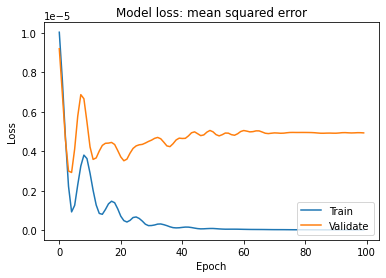

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline                

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss: mean squared error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='lower right')
plt.show()

In [104]:
from tensorflow.keras.models import load_model

# Evaluate the model from the last epoch
score = my_rnn.evaluate( x_test, y_test, verbose=0 )
print( "Test results (model from the last epoch):", [ (my_rnn.metrics_names[i], score[i]) for i in range(len(score)) ] )

# Load and evaluate the model from the best epoch
my_rnn_best = load_model('ex10_04_RNN_best.hdf5', compile=True )
score = my_rnn_best.evaluate( x_test, y_test, verbose=0 )
print( "Test results (model from the best epoch):", [ (my_rnn_best.metrics_names[i], score[i]) for i in range(len(score)) ] )

Test results (model from the last epoch): [('loss', 0.0030376676004379988), ('mean_squared_error', 0.0030376676004379988)]
Test results (model from the best epoch): [('loss', 0.002820130903273821), ('mean_squared_error', 0.002820130903273821)]


In [105]:
y_test_predict = my_rnn.predict( x_test )            # last epoch
y2_test_predict = my_rnn_best.predict( x_test )  # best epoch

# Denormalize the value
x_inv = x_minmax_norm.inverse_transform( x_test.reshape( (x_test.shape[0], x_test.shape[1]) )  )
y_inv = y_minmax_norm.inverse_transform( y_test_predict )
y2_inv = y_minmax_norm.inverse_transform( y2_test_predict )

# Round all float values to their closest integers
x_inv = np.around( x_inv )
y_inv = np.around( y_inv )
y2_inv = np.around( y2_inv )

for i in range( x_inv.shape[0] ):
    print( "x_test[{}] = {}".format( i, x_inv[i].reshape(1,x_inv[i].shape[0]) ) )
    print( "y_test_last_epoch[{}] = {}".format( i, y_inv[i] ) )
    print( "y_test_best_epoch[{}] = {}\n".format( i, y2_inv[i] ) )

x_test[0] = [[ 2.  3.  5.  8. 13. 21. 34.]]
y_test_last_epoch[0] = [  82.  234.  365.  239. 1007.]
y_test_best_epoch[0] = [ -562.   418.  2079.  1511. 10940.]

x_test[1] = [[ 46368.  75025. 121393. 196418. 317811. 514229. 832040.]]
y_test_last_epoch[1] = [1277977. 2007158. 3213012. 5188518. 8621649.]
y_test_best_epoch[1] = [1281320. 2015993. 3227175. 5183076. 8672776.]

x_test[2] = [[ 5.  8. 13. 21. 34. 55. 89.]]
y_test_last_epoch[2] = [ 171.  377.  597.  614. 1606.]
y_test_best_epoch[2] = [ -474.   560.  2309.  1884. 11534.]

x_test[3] = [[ 55.  89. 144. 233. 377. 610. 987.]]
y_test_last_epoch[3] = [ 1616.  2704.  4370.  6752. 11513.]
y_test_best_epoch[3] = [  956.  2863.  6032.  8007. 21336.]

x_test[4] = [[ 1.  2.  3.  5.  8. 13. 21.]]
y_test_last_epoch[4] = [ 62. 201. 315. 144. 833.]
y_test_best_epoch[4] = [ -582.   386.  2031.  1417. 10769.]

